In [1]:
%matplotlib inline
import pylab
import numpy as np
import functools
import adapt_float
import adapt_spike
import adapt_fixed

In [8]:
reload(adapt_float)
reload(adapt_spike)
reload(adapt_fixed)

models = {'float': adapt_float.AdaptiveFloat,
          'spike_rng': functools.partial(adapt_spike.AdaptiveSpike, has_neuron_state=False, smoothing=10),
          'spike_acc': functools.partial(adapt_spike.AdaptiveSpike, has_neuron_state=True, smoothing=10),
          'fixed_rng': functools.partial(adapt_fixed.AdaptiveFixed, has_neuron_state=False, smoothing=10),
          'fixed_acc': functools.partial(adapt_fixed.AdaptiveFixed, has_neuron_state=True, smoothing=10),
          }
          


fixed_acc
fixed_rng
float
spike_acc
spike_rng


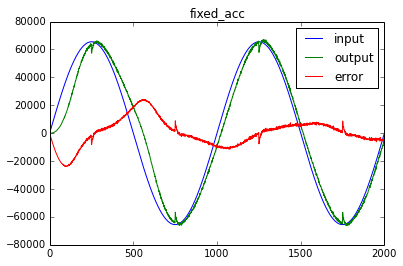

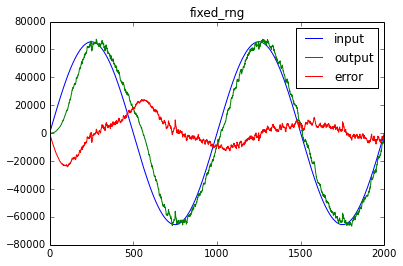

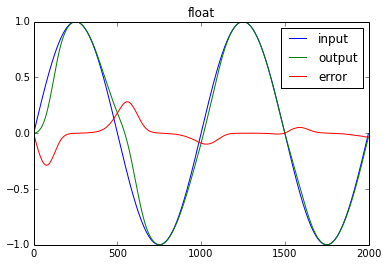

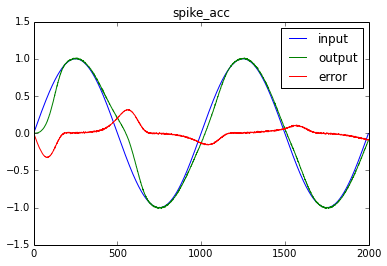

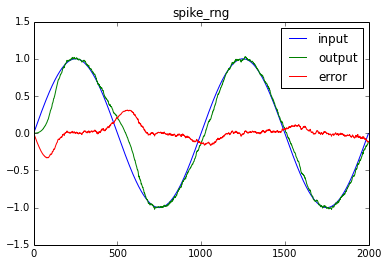

In [9]:
n_inputs = 1
n_outputs = 1
n_neurons = 256
seed = 1
stim = lambda i: [np.sin(i*2*np.pi/1000)]

for name, model in sorted(models.items()):
    print(name)
    adapt = model(n_inputs=n_inputs, n_outputs=n_outputs, n_neurons=n_neurons, seed=seed)

    inputs = []
    outputs = []
    errors = []
    error = np.zeros(1)
    for i in range(2000):
        input = np.array(stim(i))*adapt.input_max
        output = adapt.step(input, error)
        error[:] = output - input
        inputs.append(input)
        outputs.append(output)
        errors.append(output-input)
        
    pylab.figure()
    pylab.title(name)
    pylab.plot(inputs, label='input')
    pylab.plot(outputs, label='output')
    pylab.plot(errors, label='error')
    pylab.legend(loc='best')
pylab.show()

In [26]:
int(np.round(np.log2(1-np.exp(-1.0/10))))

-3